#**Import libraries**

After certain months, does the condition still present or absent?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

#**Data**

In [2]:
df=pd.read_csv('kyphosis.csv')
df.head()#kyphosis is a target.

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


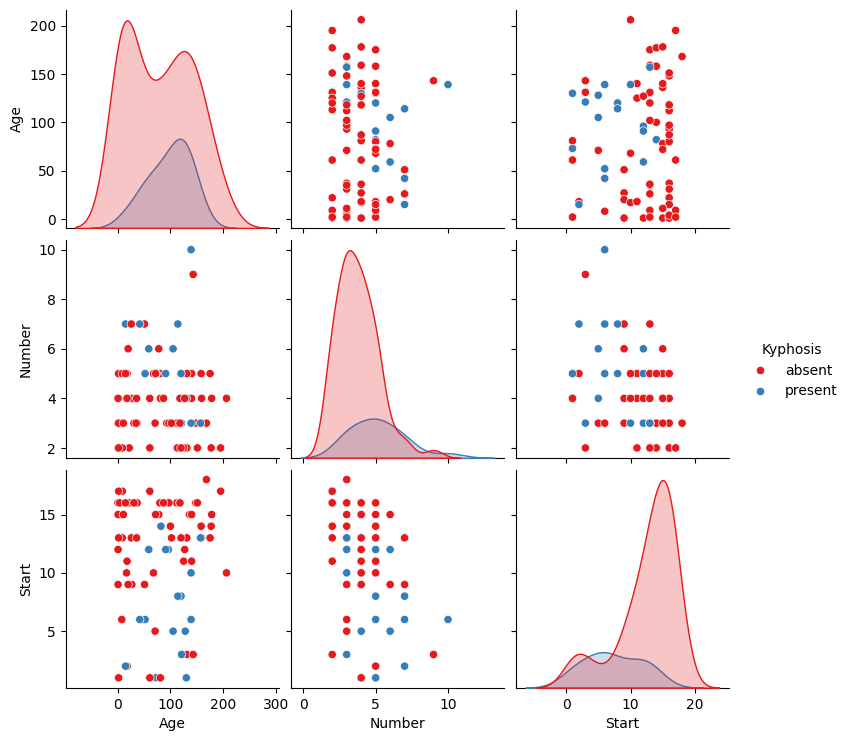

In [3]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

#**Train,test,split**

In [5]:
from sklearn.model_selection import train_test_split
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

#**Decision Tree**

In [6]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

#**Prediction and Evaluation**

In [7]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.81      0.89      0.85        19
     present       0.50      0.33      0.40         6

    accuracy                           0.76        25
   macro avg       0.65      0.61      0.62        25
weighted avg       0.74      0.76      0.74        25



In [8]:
print(confusion_matrix(y_test,predictions))

[[17  2]
 [ 4  2]]


In [9]:
print(accuracy_score(y_test,predictions))

0.76


#**Tree Decision**

In [10]:
!pip install pydot

In [11]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot
from six import StringIO
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

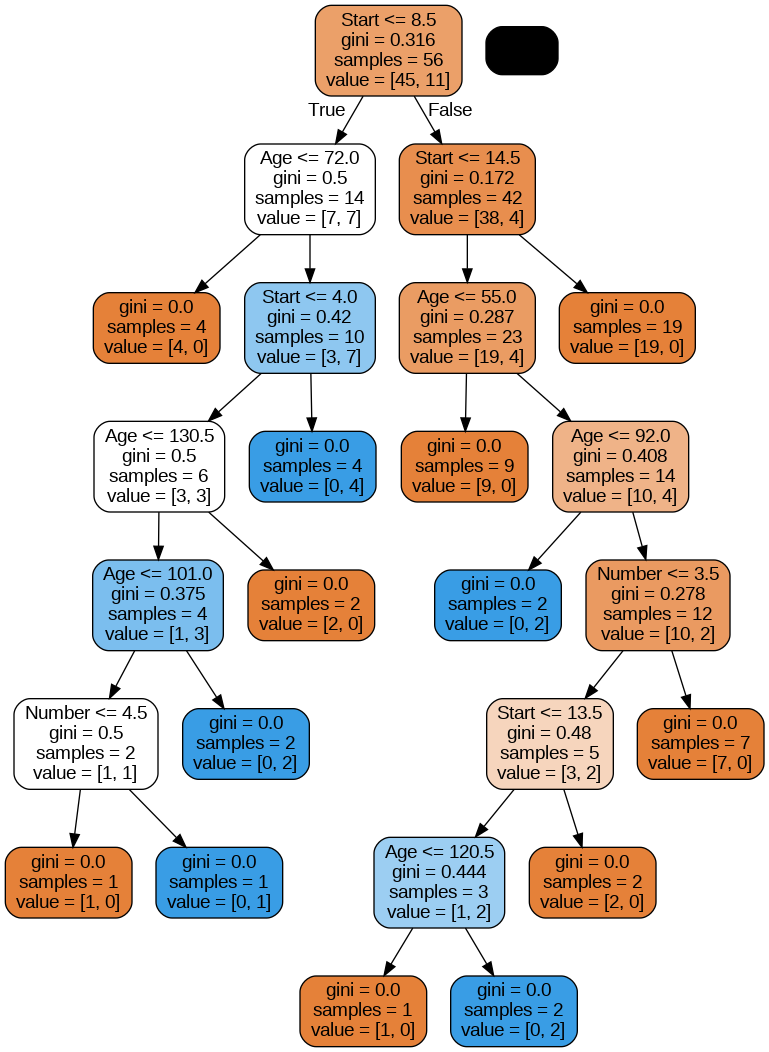

In [12]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

#**Random forests**

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
rfc_pred = rfc.predict(X_test)

In [15]:
print(confusion_matrix(y_test,rfc_pred))

[[18  1]
 [ 5  1]]


In [16]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.78      0.95      0.86        19
     present       0.50      0.17      0.25         6

    accuracy                           0.76        25
   macro avg       0.64      0.56      0.55        25
weighted avg       0.71      0.76      0.71        25



In [17]:
print(accuracy_score(y_test,rfc_pred))

0.76


#**Project**

Random Forest Project
For this project we will be exploring publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a very interesting year in 2016, so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from here or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:

* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

* installment: The monthly installments owed by the borrower if the loan is funded.

* log.annual.inc: The natural log of the self-reported annual income of the borrower.

* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

#**Import**

In [18]:
import pandas as pd
import seaborn as sns
import numpy as ny
%matplotlib inline

#**Data**

In [20]:
loans=pd.read_csv('loan_data.csv')
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


<Axes: >

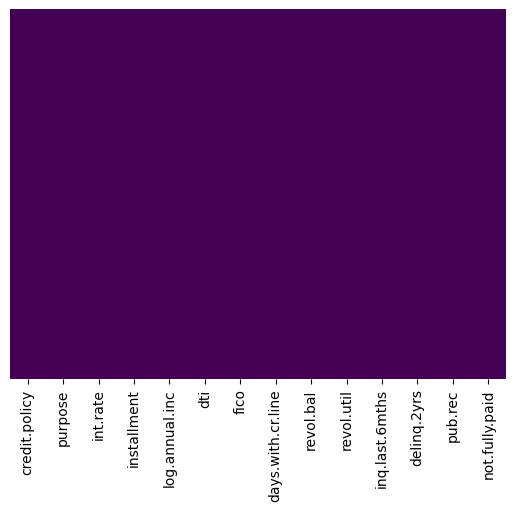

In [21]:
sns.heatmap(loans.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [22]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [23]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


#**Explatory data analysis**

Text(0.5, 0, 'FICO')

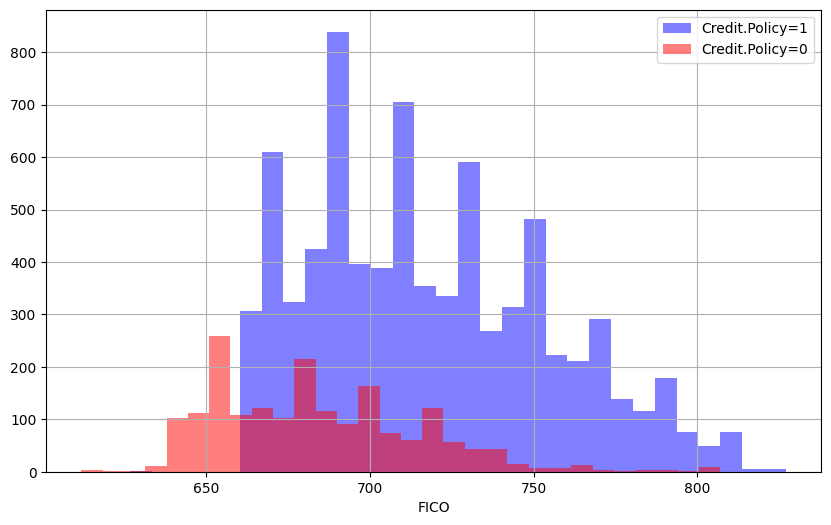

In [24]:
#** Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

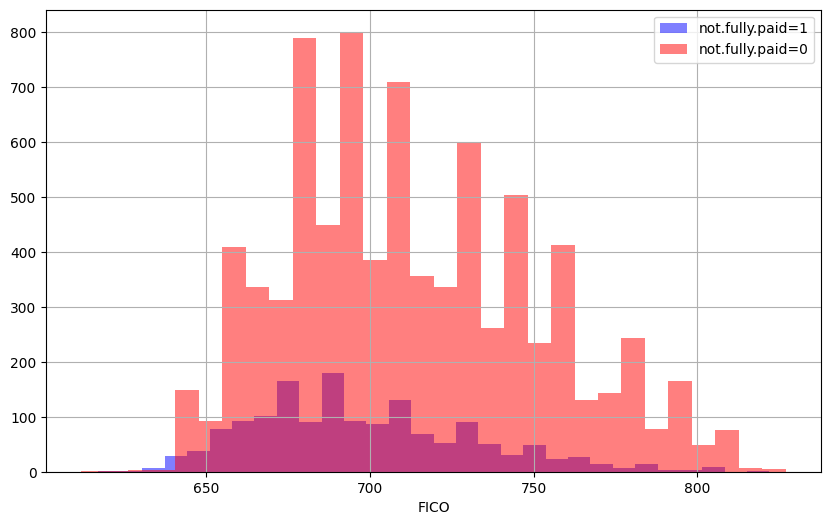

In [25]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<Axes: xlabel='purpose', ylabel='count'>

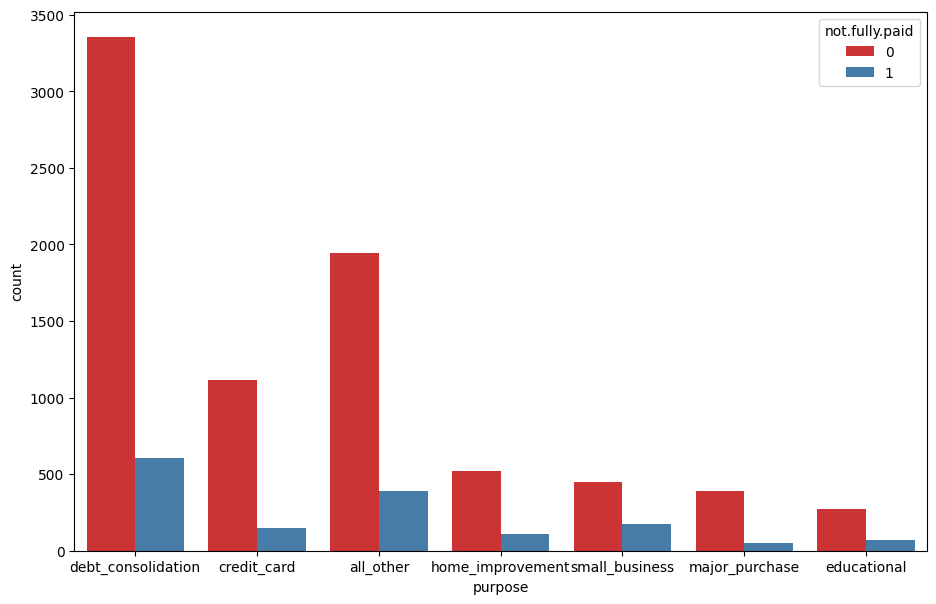

In [26]:
#**Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

<Figure size 1100x700 with 0 Axes>

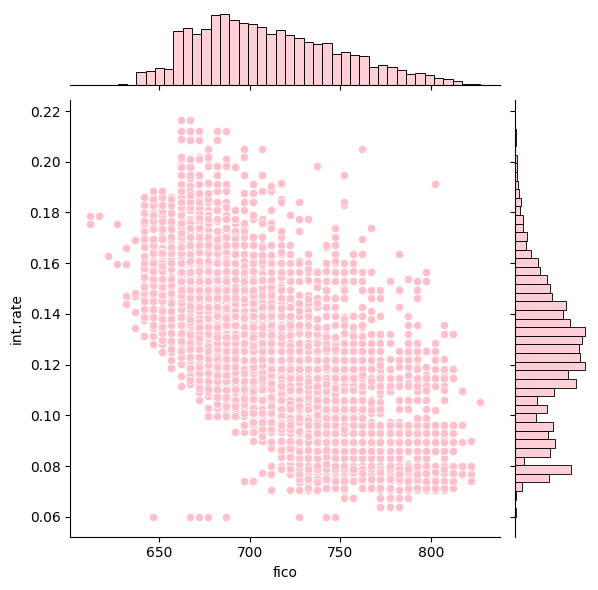

In [27]:
plt.figure(figsize=(11,7))
sns.jointplot(x='fico',y='int.rate',data=loans,color='pink')

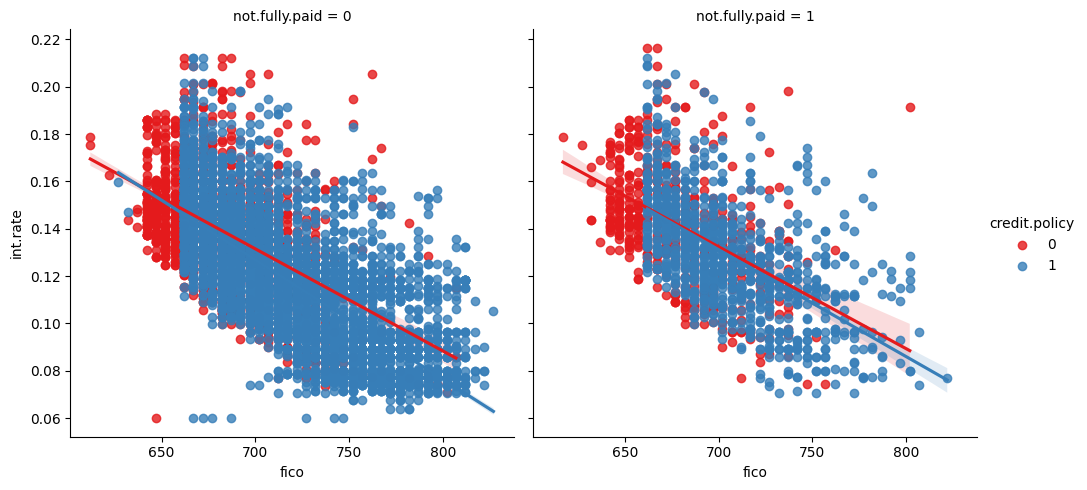

In [28]:
#** Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy.
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

#**Setting up the Data**

In [29]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


**Categorical Features**

Notice that the purpose column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

In [30]:
purposee= pd.get_dummies(loans['purpose'],drop_first=True)
purposee.head()

,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,False,True,False,False,False,False
1,True,False,False,False,False,False
2,False,True,False,False,False,False
3,False,True,False,False,False,False
4,True,False,False,False,False,False


In [31]:
final_data=pd.concat([loans,purposee],axis=1)
final_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


In [32]:
final_data.drop('purpose',axis=1,inplace=True)
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


In [33]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [34]:
final_data.info()# see the difference now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   credit.policy       9578 non-null   int64  
 1   int.rate            9578 non-null   float64
 2   installment         9578 non-null   float64
 3   log.annual.inc      9578 non-null   float64
 4   dti                 9578 non-null   float64
 5   fico                9578 non-null   int64  
 6   days.with.cr.line   9578 non-null   float64
 7   revol.bal           9578 non-null   int64  
 8   revol.util          9578 non-null   float64
 9   inq.last.6mths      9578 non-null   int64  
 10  delinq.2yrs         9578 non-null   int64  
 11  pub.rec             9578 non-null   int64  
 12  not.fully.paid      9578 non-null   int64  
 13  credit_card         9578 non-null   bool   
 14  debt_consolidation  9578 non-null   bool   
 15  educational         9578 non-null   bool   
 16  home_i

#**Train, test,split**

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_data.drop('not.fully.paid',axis=1), final_data['not.fully.paid'], test_size=0.30, random_state=42)

# **Training a Decision Tree Model**

In [36]:
from sklearn.tree import DecisionTreeClassifier
tr=DecisionTreeClassifier()
tr.fit(X_train,y_train)

DecisionTreeClassifier()

In [37]:
pred=tr.predict(X_test)

#**Predictions and Evaluation of Decision Tree**

In [38]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2408
           1       0.19      0.20      0.20       466

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.73      0.74      2874



In [39]:
print(confusion_matrix(y_test,pred))

[[2011  397]
 [ 371   95]]


#**Training the Random Forest model¶**

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_prediction=rfc.predict(X_test)

In [41]:
print(confusion_matrix(y_test,rfc_prediction))

[[2390   18]
 [ 457    9]]


In [42]:
print(classification_report(y_test,rfc_prediction))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.33      0.02      0.04       466

    accuracy                           0.83      2874
   macro avg       0.59      0.51      0.47      2874
weighted avg       0.76      0.83      0.77      2874

